<a href="https://colab.research.google.com/github/nicolasmontano/datasciencecoursera/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from itertools import product #unique combinations
sns.set_style('darkgrid')
plt.style.use('ggplot')
pd.options.display.max_columns = None
pd.options.display.max_rows=200

In [0]:
#Read files
path='/content/drive/My Drive/kaggle/Data/'
#train
train=pd.read_csv(path+'sales_train.csv')
train['date']=pd.to_datetime(train['date'],format='%d.%m.%Y')
#train.set_index('date',inplace=True)
#train['revenue']=sales_train['item_cnt_day']*sales_train['item_price']
#test
test=pd.read_csv(path+'test.csv')
test.drop('ID',axis=1,inplace=True)
test=pd.concat([pd.DataFrame(np.ones(test.shape[0]).astype(int)*34),test],axis=1)
test.rename(columns={0:'date_block_num'},inplace=True)

item_categories=pd.read_csv(path+'item_categories.csv')
items=pd.read_csv(path+'items.csv')
shops=pd.read_csv(path+'shops.csv')

In [0]:
'''
EDA:
1. DUPLICATES
2. NULL VALUES 
'''
#1 DUPLICATES
dfs=[train,item_categories,items,shops,test]

for df in dfs:
  print(' ')
  print(df.head(3))
print(' ')  
print('Duplicates')
print('Duplicated shops in shops: {}'.format(shops['shop_id'].duplicated().sum()))
print('Duplicated names in item_categories: {}'.format(item_categories['item_category_name'].duplicated().sum()))
print('Duplicated category id  in item_categories: {}'.format(item_categories['item_category_id'].duplicated().sum()))
print('Duplicated items in items: {}'.format(items['item_id'].duplicated().sum()))
print(' ') 
print('Nulls in Datasets')
for i, df in enumerate(dfs):
   print(df.isna().sum().sum())

NameError: ignored

In [0]:
'''
EDA:
1. DUPLICATES
2. NULL VALUES 
3. Descripitve ANALYSIS
4. outliers
'''
for df in dfs:
  print(df.describe())

       date_block_num       shop_id       item_id    item_price  item_cnt_day
count    2.935849e+06  2.935849e+06  2.935849e+06  2.935849e+06  2.935849e+06
mean     1.456991e+01  3.300173e+01  1.019723e+04  8.908532e+02  1.242641e+00
std      9.422988e+00  1.622697e+01  6.324297e+03  1.729800e+03  2.618834e+00
min      0.000000e+00  0.000000e+00  0.000000e+00 -1.000000e+00 -2.200000e+01
25%      7.000000e+00  2.200000e+01  4.476000e+03  2.490000e+02  1.000000e+00
50%      1.400000e+01  3.100000e+01  9.343000e+03  3.990000e+02  1.000000e+00
75%      2.300000e+01  4.700000e+01  1.568400e+04  9.990000e+02  1.000000e+00
max      3.300000e+01  5.900000e+01  2.216900e+04  3.079800e+05  2.169000e+03
       item_category_id
count         84.000000
mean          41.500000
std           24.392622
min            0.000000
25%           20.750000
50%           41.500000
75%           62.250000
max           83.000000
           item_id  item_category_id
count  22170.00000      22170.000000
mean   1

In [0]:
group_train=train.groupby('date_block_num')['item_cnt_day'].agg({'No_items':'sum'})
group_price=train.groupby('date_block_num')['item_price'].agg({'price':'mean'})
months_train=pd.DataFrame(pd.date_range(start='01/01/2013',freq='M',periods=34).day).rename(columns={0:'day_month'})
group_train=pd.concat([group_train,group_price],axis=1)
group_train=pd.concat([group_train,months_train],axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  


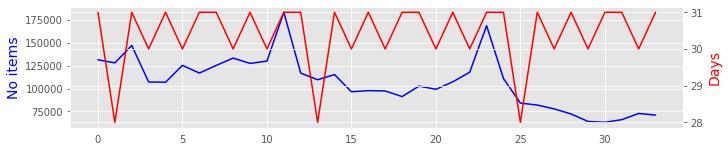

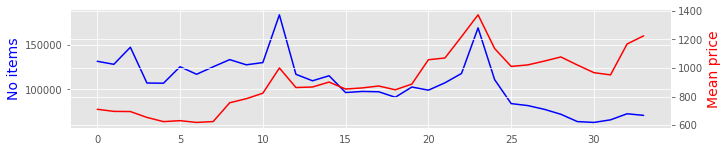

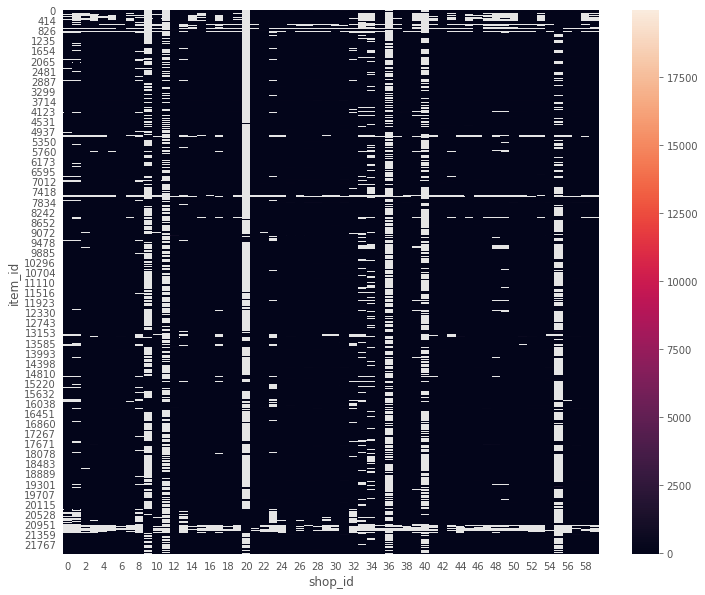

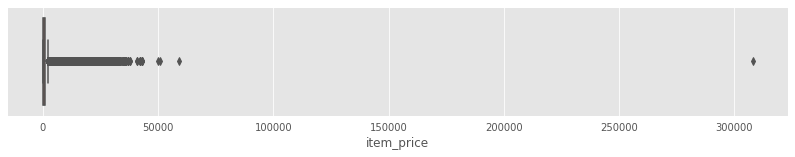

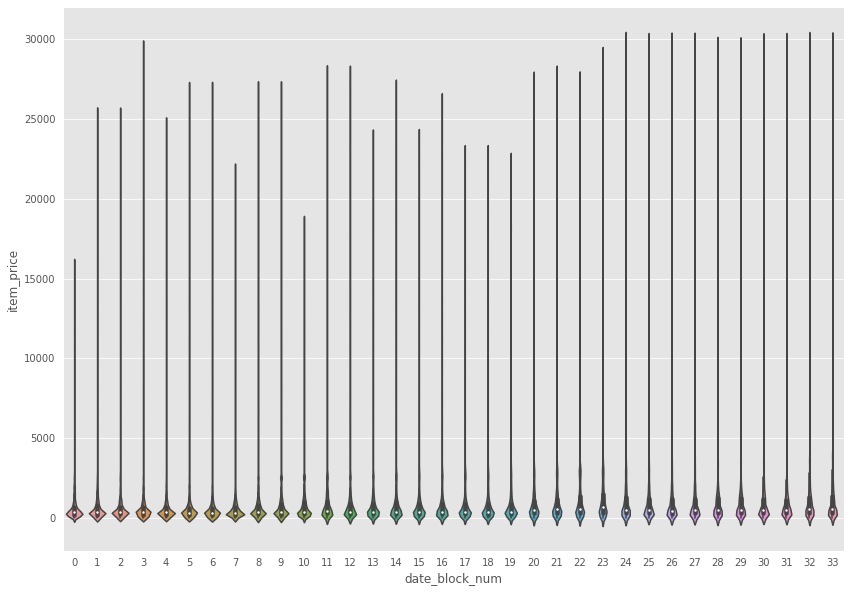

In [0]:
;#PLOT
fig, ax1 = plt.subplots(constrained_layout=True,figsize=(10,2))
ax2 = ax1.twinx()
ax1.plot(group_train.index,group_train['No_items'],color='b',label='no_items')
ax1.set_ylabel("No items",color="blue",fontsize=14)
#ax1.legend(loc='lower right')
ax2.plot(group_train.index,group_train['day_month'], color="r",label='a')
ax2.set_ylabel("Days",color="red",fontsize=14)
plt.show()

#PLOT 2 mean price and 
fig, ax1 = plt.subplots(constrained_layout=True,figsize=(10,2))
ax2 = ax1.twinx()
ax1.plot(group_train.index,group_train['No_items'],color='b',label='no_items')
ax1.set_ylabel("No items",color="blue",fontsize=14)
#ax1.legend(loc='lower right')
ax2.plot(group_train.index,group_train['price'], color="r",label='a')
ax2.set_ylabel("Mean price",color="red",fontsize=14)
plt.show()
#plot 3
piv=pd.pivot_table(data=train,values='item_cnt_day',columns='shop_id',index='item_id',aggfunc='sum')
plt.figure(figsize=(12,10))
sns.heatmap(piv,mask=piv.isnull())
plt.show()
plt.figure(figsize=(14,2))
sns.boxplot(train['item_price'])
plt.show()
plt.figure(figsize=(14,10))
sns.violinplot(x='date_block_num', y='item_price',data=train[train['item_price']<30000])
plt.show()
